We remember that the way the formula to diagonalize the covariance matrix was via a Fourier transform with the condition
$$
M_{m n}=\frac{1}{N} \sum_{\theta_{k} \in(-\pi, \pi)} \omega\left(\theta_{k}\right) e^{\phi\left(\theta_{k}\right)} e^{i(m-n) \theta_{k}}
$$
with $\omega\left(\theta_{k}\right)=\omega\left(\theta_{k}\right)^{*}=\omega\left(-\theta_{k}\right),\  \phi\left(-\theta_{k}\right)=-\phi\left(\theta_{k}\right)$. So $\Omega$ is real and $\phi$ is skew-symmetric, and are given by
$$
\omega^{2}\left(\theta_{k}\right) :=\left(\lambda-\cos \theta_{k}\right)^{2}+\gamma^{2} \sin ^{2} \theta_{k}
$$

$$
\phi\left(\theta_{k}\right) :=\arctan \left(\frac{-\gamma \sin \theta_{k}}{\lambda-\cos \theta_{k}}\right)
$$
So we define $\alpha(\theta)=\lambda-\cos \theta_{k}$ and $\beta(\theta)=-\gamma \sin \theta_{k}$

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from ipywidgets import interactive


# -------------------------- To center the output ---------------
from IPython.display import display, HTML
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

# ---------------------------------------------------
# Define the parameters of the system
N_size=41 #
Gamma=0.5
Lambda=0.5

# ---------------------------------------------------

def Alpha(Gamma,Lambda,theta):
    return Lambda+np.cos(theta)
def Beta(Gamma,Lambda,theta):
    return -Gamma*np.sin(theta)
def Omega(Gamma,Lambda,theta):
    return np.sqrt(Alpha(Gamma,Lambda,theta)**2 + Beta(Gamma,Lambda,theta)**2 )
def Phi(Gamma,Lambda,theta):
    return np.arctan2(Beta(Gamma,Lambda,theta),Alpha(Gamma,Lambda,theta))

In [2]:
def Plot_energies(Gamma,Lambda):
    plt.figure(figsize=(13,8))
    x=np.linspace(-np.pi,np.pi,100)
    plt.plot(x,Phi(Gamma,Lambda,x),label=r"$\phi$")
    plt.plot(x,Alpha(Gamma,Lambda,x),label=r"$\alpha$")
    plt.plot(x,Beta(Gamma,Lambda,x),label=r"$\beta$")
    plt.plot(x,Omega(Gamma,Lambda,x),label=r"$\Omega$")
    plt.legend()
    plt.show() 
interactive_plot = interactive(Plot_energies, Gamma=(-2, 2,0.1), Lambda=(-2, 2, 0.1))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='Gamma', max=2.0, min=-2.0), FloatSlider(value=0.0, d…

In [3]:
def Fermi_dirac(beta,mu,n,Gamma=Gamma,Lambda=Lambda,N=N_size):
    # beta is the inverse thermic energy associated in the system (beta)
    # mu corresponds to the chemical potential
    # n is the position of the particle
    # f=np.exp(T*(Omega(Gamma,Lambda,2.0*(np.pi/N)*n)-mu)) +1
    # N corresponds to the size of the system
    f=np.exp(beta*(Omega(Gamma,Lambda,((2.*np.pi)/float(N)) * n)-mu)) +1
    return 1/f
def plot_interactive(beta,mu):
    plt.figure(figsize=(10,7))
    n=np.arange(-(N_size-1)/2,(N_size-1)/2+ 1)
    plt.subplot(2,1,1)
    plt.plot(n,Fermi_dirac(beta,mu,n))
    #plt.ylim(-0.05,1.05)
    plt.xlabel("Position")
    plt.ylabel("Probability")
    plt.subplot(2,1,2)
    plt.plot(n,Omega(Gamma,Lambda,(2.*np.pi)/float(N_size)*n),label=r"$\Omega$")
    plt.show()

Ask about the values of $\beta$ for the temperature and $\mu$ to sample from the Fermi-Dirac distribution

In [4]:

interactive_plot = interactive(plot_interactive, beta=(0, 2,0.001), mu=(-2, 2, 0.01))
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='beta', max=2.0, step=0.001), FloatSlider(value=0.0, …

Now we sample the number of occupation number for $\sin$ and $\cos$, but as we have to sample the modes for half the circle and then all for the other half we fix exactly the same number. Such construction has to satisfy.

$$
m_{\cos}[n]=m_{\cos}[-n]\quad  \forall n>0
$$
$$
m_{\sin}[n]=m_{\sin}[-n]\quad  \forall n>0
$$

So first we sample the random numbers for half for the circle and then extend this for the other half. remembering that the right upper part of the covariance matrix can be computed as:


$$
\begin{aligned} \tilde{\Gamma}_{m n} &=\sum_{\theta_{k}}^{\pi}\left[m^{c}\left(\theta_{k}\right) u_{m}^{c}\left(\theta_{k}\right) v_{n}^{c}\left(\theta_{k}\right)+m^{s}\left(\theta_{k}\right) u_{m}^{s}\left(\theta_{k}\right) v_{n}^{s}\left(\theta_{k}\right)\right] \\ &=\sum_{\theta_{k}=-\pi}^{\pi}\left(\frac{m^{c}\left(\theta_{k}\right)+m^{s}\left(\theta_{k}\right)}{2}\right)\left(u_{m}^{c}\left(\theta_{k}\right) v_{n}^{c}\left(\theta_{k}\right)+u_{m}^{s}\left(\theta_{k}\right) v_{n}^{s}\left(\theta_{k}\right)\right) \\ &+\sum_{\theta_{k}=-\pi}^{\pi}\left(\frac{m^{c}\left(\theta_{k}\right)-m^{s}\left(\theta_{k}\right)}{2}\right)\left(u_{m}^{c}\left(\theta_{k}\right) v_{n}^{c}\left(\theta_{k}\right)-u_{m}^{s}\left(\theta_{k}\right) v_{n}^{s}\left(\theta_{k}\right)\right) \end{aligned}
$$


which is basically

$$
\tilde{\Gamma}_{m n}=\overbrace{\sum_{\theta_{k}=-\pi}^{\pi} m^{+}\left(\theta_{k}\right) e^{i \phi\left(\theta_{k}\right)} e^{i(n-m) \theta_{k}}}^{\tilde{\Gamma}_{m n}^{+}}+\underbrace{\sum_{\theta_{k}=-\pi}^{\pi} m^{-}\left(\theta_{k}\right) e^{i \phi\left(\theta_{k}\right)} e^{i(n+m) \theta_{k}}}_{\tilde{\Gamma}_{m n}^{-}}
$$
 the Fourier transform of $
m^{+}\left(\theta_{k}\right) e^{i \phi\left(\theta_{k}\right)}$ y $ m^{-}\left(\theta_{k}\right) e^{i \phi\left(\theta_{k}\right)}$

In [5]:
x=np.arange(0,(N_size-1)/2+ 1)
beta=0.01
mu=2
m_cos=[-0.5 if np.random.random()>Fermi_dirac(beta,mu,i) else 0.5 for i in x]
m_sin=[-0.5 if np.random.random()>Fermi_dirac(beta,mu,i) else 0.5 for i in x]
m_cos=np.array(m_cos[1:][::-1]+m_cos)
m_sin=np.array(m_sin[1:][::-1]+m_sin)
M_plus=(m_cos+m_sin)*0.5
M_minous=(m_cos-m_sin)*0.5

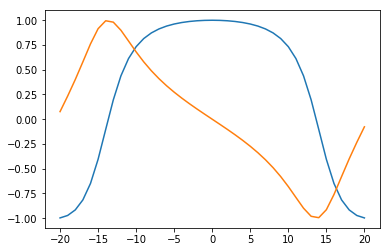

In [6]:
M_plus=1
M_minous=0
x=np.arange(-(N_size-1)/2,(N_size-1)/2+1)
Mplusband=[np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i))) for i in x]
Mplusband=M_plus*np.array(Mplusband)
plt.plot(x,Mplusband.real)
plt.plot(x,Mplusband.imag)
plt.show()

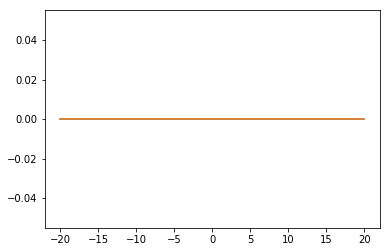

In [7]:
x=np.arange(-(N_size-1)/2,(N_size-1)/2+1)
Mminousband=[np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i))) for i in x]
Mminousband=M_minous*np.array(Mminousband)
plt.plot(x,(Mminousband).real)
plt.plot(x,(Mminousband).imag)
plt.show()

In [8]:
Mminousband_new=np.roll(Mminousband,-(N_size-1)//2)
Mplusband_new=np.roll(Mplusband,-(N_size-1)//2)

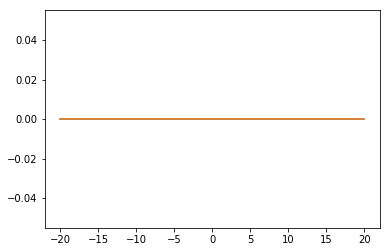

In [9]:
plt.plot(x,(Mminousband_new).real)
plt.plot(x,(Mminousband_new).imag)
plt.show()

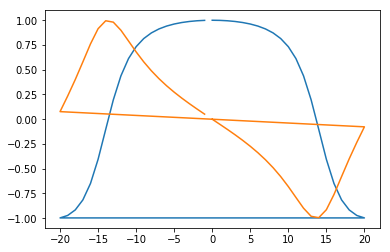

In [30]:
from scipy.fftpack import fft, ifft,ifftshift,fftshift
plt.plot(ifftshift(x),(Mplusband_new).real)
plt.plot(ifftshift(x),(Mplusband_new).imag)
plt.show()

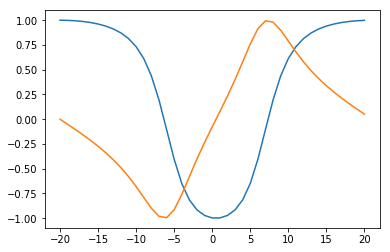

In [17]:
x=np.arange(-(N_size-1)/2,(N_size-1)/2+1)
plt.plot(x,(Mplusband_new).real)
plt.plot(x,(Mplusband_new).imag)
plt.show()

In [18]:
from scipy.fftpack import fftfreq

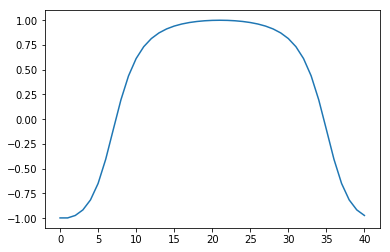

In [24]:
plt.plot(ifftshift(Mplusband_new))

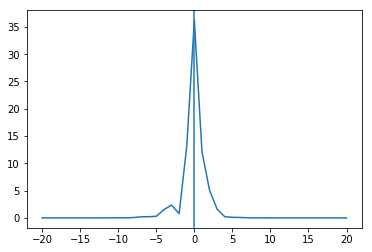

In [56]:
#Mminousband_new=np.roll(Mminousband,-(N_size-1)//2)
#Mplusband_new=np.roll(Mplusband,-(N_size-1)//2)
#x=np.arange(-(N_size-1)/2,(N_size-1)/2+1)
#plt.plot(x,np.abs(np.roll(fft(Mplusband_new),int((N_size-1)/2))))
#x=np.arange(0,(N_size))
plt.plot(x,np.sqrt(np.square(ifftshift(fft(fftshift(Mplusband_new))))))
plt.axvline(x=0)

In [54]:
x[np.argmin(fft(ifftshift(Mplusband_new)))]

20.0

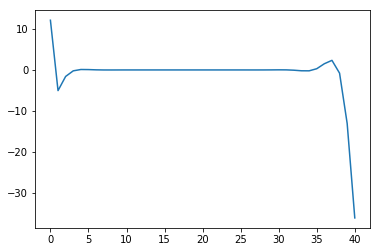

In [46]:
plt.plot(fft(fftshift(Mplusband_new)))

In [34]:
from scipy.linalg import circulant

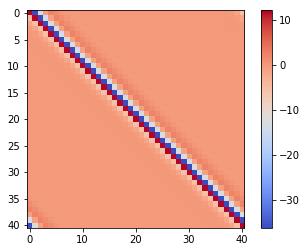

In [47]:
plt.imshow(circulant(fft(fftshift(Mplusband_new))).real,cmap="coolwarm")
plt.colorbar()

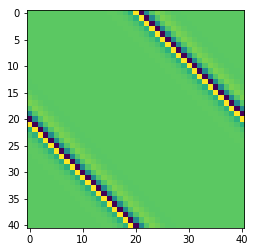

In [58]:
plt.imshow(circulant(ifftshift(fft(fftshift(Mplusband_new))).real))

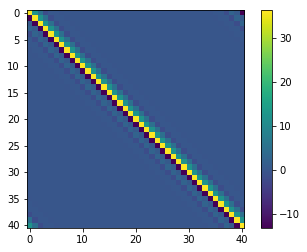

In [14]:
plt.imshow(circulant(fft(Mplusband_new)[::-1].real))
plt.colorbar()

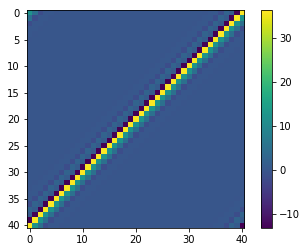

In [29]:
plt.imshow(circulant(fft(Mplusband_new)[::-1].real)[::-1])
plt.colorbar()

In [26]:
circulant(fft(Mplusband_new)[::-1]).max()

(36.3206529532368+0j)

In [15]:
from scipy.linalg import circulant

In [16]:
circulant([1,2,2,])

array([[1, 2, 2],
       [2, 1, 2],
       [2, 2, 1]])

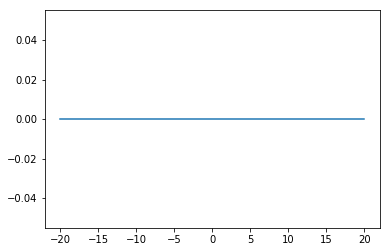

In [17]:
x=np.arange(-(N_size-1)/2,(N_size-1)/2+1)
plt.plot(x,fft(Mminousband_new).real)

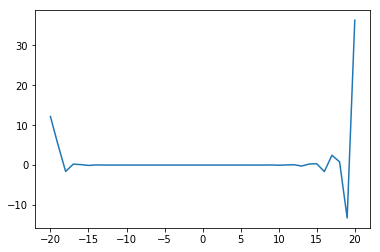

In [18]:
plt.plot(x,(fft(Mplusband_new)+fft(Mminousband_new)).real)

In [19]:
(fft(Mplusband_new)+fft(Mminousband_new))

array([ 1.21629336e+01+0.j,  5.07187522e+00+0.j, -1.61041996e+00+0.j,
        2.26932895e-01+0.j,  1.13009244e-01+0.j, -9.44683713e-02+0.j,
        2.76302502e-02+0.j,  4.87190629e-03+0.j, -8.87471174e-03+0.j,
        3.88231536e-03+0.j, -7.47196948e-05+0.j, -9.29783336e-04+0.j,
        5.67885846e-04+0.j, -9.55946160e-05+0.j, -9.26936889e-05+0.j,
        8.39298430e-05+0.j, -3.49000091e-05+0.j,  1.08276642e-05+0.j,
        6.25327233e-06+0.j, -5.34671445e-05+0.j,  1.16768237e-04+0.j,
       -8.57122730e-05+0.j, -1.91457398e-04+0.j,  6.68645380e-04+0.j,
       -7.71396173e-04+0.j, -5.39935219e-04+0.j,  3.58687613e-03+0.j,
       -5.69906800e-03+0.j,  2.49266217e-04+0.j,  1.80184462e-02+0.j,
       -3.85338639e-02+0.j,  2.14965494e-02+0.j,  8.31762163e-02+0.j,
       -2.49776305e-01+0.j,  2.50772572e-01+0.j,  3.31543622e-01+0.j,
       -1.63867767e+00+0.j,  2.46044571e+00+0.j,  8.07490389e-01+0.j,
       -1.32607027e+01+0.j,  3.63206530e+01+0.j])

In [59]:
circulant?